# Dataset Insights

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_DIR_PATH = "../data/"
CLEAN = "c"
LANG = ""

INDUSTRIES_PATH_CSV = DATA_DIR_PATH + "industries.csv"
TRAIN_PATH_CSV = DATA_DIR_PATH + CLEAN + "train" + LANG + ".csv"
TEST_PATH_CSV = DATA_DIR_PATH + CLEAN + "test" + LANG + ".csv"

In [3]:
%%time
train = pd.read_csv(TRAIN_PATH_CSV, lineterminator='\n').fillna("")
train.shape

CPU times: user 6.39 s, sys: 897 ms, total: 7.28 s
Wall time: 7.28 s


(30292, 24)

In [4]:
train.head(1)

,url,group_representative,group_representative_label,text,chtml,<meta>_title,<meta>_keywords,<meta>_description,<title>,<h1>,...,<h6>,<b>,<strong>,<em>,<i>,<p>,<a>,<li>,<div>,country
0,http://12-18.com,30,"Leisure, Travel & Tourism",\n\nInvestment Management.\n\nEin glückliches ...,<html>\n<head>\n\t<title>12.18. Investment Man...,12.18. Investment Management - ANDERS. AUS PRI...,"12 18, 1218 Investment, 12 18 Invest, lim, lin...",Ein glückliches Investment ist das Resultat ha...,12.18. Investment Management - ANDERS. AUS PRI...,,...,,,,,Wir nehmen den Datenschutz nach EU-DSGVO erns...,12.18. Investment Management GmbHKönigsallee ...,"Studie ""Ferienimmobilien"" Downloaden Hotel St...",karriere DE / EN Investment Management Newslet...,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,DE


In [5]:
ratios = []

for idx, row in train.iterrows():
    len_div = len(row["<div>"].strip())
    len_text = len(row["text"].strip())
    if len_div != 0 and len_text != 0:
        ratio = len_div/len_text
        ratios.append(ratio)

In [6]:
np.mean(ratios)

0.2031314987687735

In [ ]:
freq = {}
sizes = {}

for col in sorted(train.columns):
    if col.startswith("<"):
        tmp = train[train[col] != ""]
        count = len(tmp)

        tmp['length'] = tmp[col].astype(str).map(len)
        mean_length = tmp['length'].mean()

        abs_freq = np.round(count/30292, decimals=3)
        freq[col] = abs_freq
        sizes[col] = int(mean_length)
        print(f"{col}:", count, abs_freq)
        print("\t", "Mean length:", mean_length)

/Users/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<a>: 29874 0.986
	 Mean length: 2628.3199102898843
<b>: 5433 0.179
	 Mean length: 125.49585864163446
<div>: 29592 0.977
	 Mean length: 1292.7111043525276
<em>: 2997 0.099
	 Mean length: 212.36436436436438
<h1>: 20810 0.687
	 Mean length: 85.37102354637193
<h2>: 23819 0.786
	 Mean length: 229.07103572778036
<h3>: 20427 0.674
	 Mean length: 294.0488569050766
<h4>: 12935 0.427
	 Mean length: 230.19250096637032
<h5>: 5844 0.193
	 Mean length: 193.76762491444217
<h6>: 2904 0.096
	 Mean length: 173.8185261707989
<i>: 2268 0.075
	 Mean length: 119.57451499118166
<li>: 28261 0.933
	 Mean length: 9052.559215880543
<meta>_description: 22779 0.752
	 Mean length: 182.05816761051847
<meta>_keywords: 18 0.001
	 Mean length: 145.16666666666666
<meta>_title: 17021 0.562
	 Mean length: 42.88901944656601
<p>: 29149 0.962
	 Mean length: 2788.5300353356893
<strong>: 16424 0.542
	 Mean length: 219.59157330735508
<title>: 30021 0.991
	 Mean length: 51.36444488857799


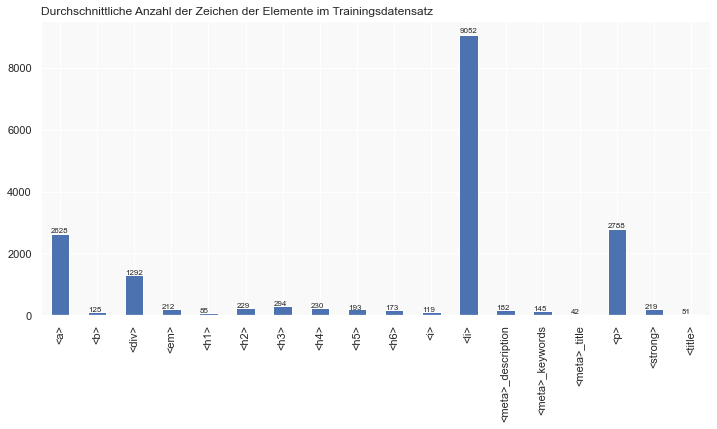

In [ ]:
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True})

df = pd.DataFrame.from_dict(sizes, orient="index", columns=["element"])

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff', "font.size": 8})

ax = df.plot(kind="bar", figsize=(10,6), legend=False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.009))


plt.title("Durchschnittliche Anzahl der Zeichen der Elemente im Trainingsdatensatz",
          loc="left")
plt.savefig("img/mean_element_character_length.png", dpi=300)
plt.show()

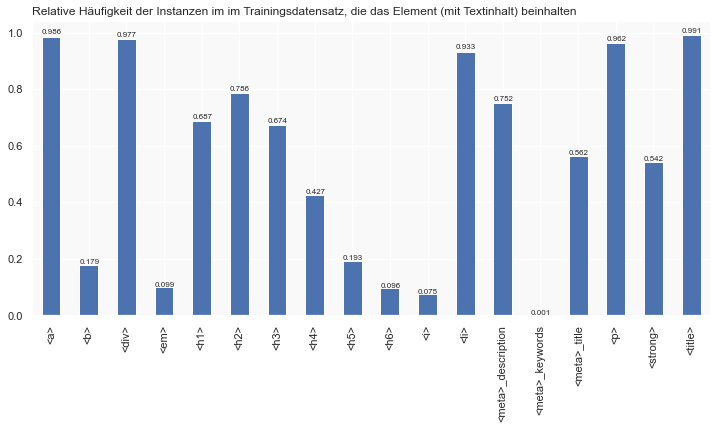

In [ ]:
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True})

df = pd.DataFrame.from_dict(freq, orient="index", columns=["element"])

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff', "font.size": 8})

ax = df.plot(kind="bar", figsize=(10,6), legend=False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.009))


plt.title("Relative Häufigkeit der Instanzen im im Trainingsdatensatz, die das Element (mit Textinhalt) beinhalten",
          loc="left")
#plt.savefig("img/relative_frequency_elements.png", dpi=300)
plt.show()

In [9]:
train[train.country == "ZH-CN"].head(1)

,url,group_representative,group_representative_label,text,chtml,<meta>_title,<meta>_keywords,<meta>_description,<title>,<h1>,...,<h6>,<b>,<strong>,<em>,<i>,<p>,<a>,<li>,<div>,country
582,http://qidian.qq.com,96,Information Technology and Services,腾讯企点_智慧客户沟通运营平台_为企业提供智慧营销服务全链路SaaS解决方案\n\n首页\n...,<html>\n\n<head>\n \n \n \n \n\t\t...,,,以即时通讯、音视频、人工智能、大数据、云呼叫中心等科技为基础，结合微信、QQ社交通路，提供从...,腾讯企点_智慧客户沟通运营平台_为企业提供智慧营销服务全链路SaaS解决方案,定制产品咨询 首页,...,,,"企点商圈 企业QQ 2.0 云电子合同 多触点营销互动管理,构建私域流量,精细化线索培育;从...",满足OTC合规,\n,"企点商圈 成为B2B合作伙伴共建产业互联网 企点的开放性及可拓展性,为客户服务智能化方向提...",\n \n ...,\n \n ...,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,ZH-CN


In [10]:
train.group_representative_label.value_counts()

Information Technology and Services     6019
Management Consulting                   2665
Mechanical or Industrial Engineering    2305
Marketing and Advertising               2086
Consumer Goods                          2024
Machinery                               2021
Financial Services                      1648
Construction                            1541
Medical Practice                        1426
Automotive                              1270
Media Production                         966
Real Estate                              946
Wholesale                                929
Human Resources                          772
Recreational Facilities and Services     622
Logistics and Supply Chain               590
Telecommunications                       550
Legal Services                           513
Insurance                                499
Leisure, Travel & Tourism                490
Renewables & Environment                 410
Name: group_representative_label, dtype: int64

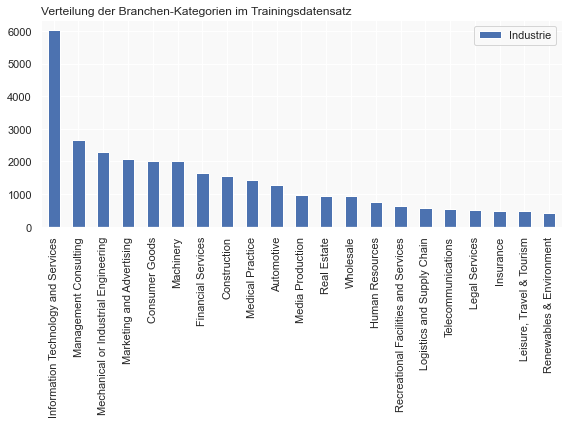

In [ ]:
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True})

train.group_representative_label.value_counts().plot(kind="bar",
                                                     figsize=(8,6),
                                                     label="Industrie")

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff', "font.size": 10})
plt.legend()
plt.title("Verteilung der Branchen-Kategorien im Trainingsdatensatz", loc="left")
plt.savefig("img/industries_distribution", dpi=300)
plt.show()

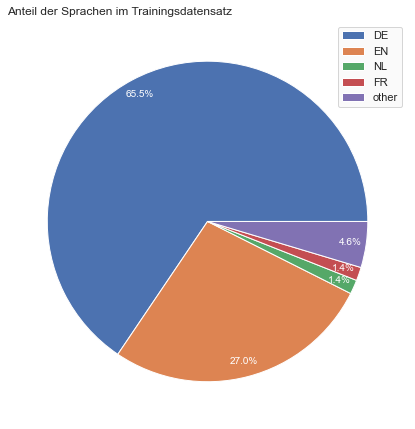

In [ ]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

n = 4
top = train.country.value_counts(normalize=True).iloc[:n]
top.loc['other'] = train.country.value_counts(normalize=True).iloc[n:].sum()

top.plot(kind="pie",
         figsize=(8,6),
         label="",
         labels=top.keys(),
         autopct='%1.1f%%',
         pctdistance=0.9,
         fontsize=10,
         textprops={'color':"w"})

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#ffffff', "font.size": 8})
plt.legend()
plt.title("Anteil der Sprachen im Trainingsdatensatz", loc="left")
plt.savefig("img/percentage_countries", dpi=300)
plt.show()

In [42]:
top.keys()

Index(['DE', 'EN', 'NL', 'FR', 'ES', 'other'], dtype='object')

In [54]:
train.country.value_counts(normalize=True)

DE       0.655454
EN       0.270335
NL       0.014294
FR       0.013535
ES       0.010003
PT       0.008220
IT       0.005084
PL       0.002773
TR       0.002443
SV       0.002113
DA       0.001618
CS       0.001387
RU       0.001320
ZH-CN    0.001254
RO       0.001089
NO       0.000990
CA       0.000924
VI       0.000825
JA       0.000660
HR       0.000627
ID       0.000561
HU       0.000528
KO       0.000495
EL       0.000396
BG       0.000363
FI       0.000363
SQ       0.000198
UK       0.000198
FA       0.000198
ET       0.000198
AF       0.000165
HE       0.000165
TL       0.000165
SK       0.000165
TH       0.000132
SL       0.000132
AR       0.000132
LT       0.000099
SW       0.000099
MK       0.000099
LV       0.000099
SO       0.000066
NE       0.000033
Name: country, dtype: float64

In [18]:

out

DE       19855
EN        8189
NL         433
FR         410
ES         303
other     1102
Name: country, dtype: int64

In [13]:
train.group_representative_label.value_counts(normalize=True)

Information Technology and Services     0.198699
Management Consulting                   0.087977
Mechanical or Industrial Engineering    0.076093
Marketing and Advertising               0.068863
Consumer Goods                          0.066816
Machinery                               0.066717
Financial Services                      0.054404
Construction                            0.050872
Medical Practice                        0.047075
Automotive                              0.041925
Media Production                        0.031890
Real Estate                             0.031229
Wholesale                               0.030668
Human Resources                         0.025485
Recreational Facilities and Services    0.020533
Logistics and Supply Chain              0.019477
Telecommunications                      0.018157
Legal Services                          0.016935
Insurance                               0.016473
Leisure, Travel & Tourism               0.016176
Renewables & Environ